<a href="https://colab.research.google.com/github/FajarRisk1/Project-Capstone-IL/blob/main/Project_Capstone_Bagus_Nur_Fajar_Riski_Analisis_Dataset_ACLED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages
!pip install squarify folium wordcloud nltk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import squarify
from matplotlib import cm
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Set up seaborn style
sns.set_style('ticks')

# Import the dataset
link = 'https://raw.githubusercontent.com/FajarRisk1/Project-Capstone-IL/main/2015-01-01-2019-01-31-South-Eastern_Asia-Indonesia.csv'
df = pd.read_csv(link, encoding="UTF-8")

In [ ]:
# Display the first 5 rows of the dataset
df.head(5)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,5590925,360,IDN520,520,31 January 2019,2019,1,Battles,Armed clash,TPNPB: West Papua National Liberation Army,...,Mapenduma,-4.3887,138.2340,1,Jakarta Post,National,"On January 31, 2019, in Mapenduma village (Ndu...",0,1563366749,IDN
1,5590925,360,IDN520,520,31 January 2019,2019,1,Battles,Armed clash,Military Forces of Indonesia (2014-),...,Mapenduma,-4.3887,138.2340,1,Jakarta Post,National,"On January 31, 2019, in Mapenduma village (Ndu...",0,1563366749,IDN
2,6301918,360,IDN526,526,31 January 2019,2019,1,Violence against civilians,Attack,Police Forces of Indonesia (2014-),...,Wamena,-4.0951,138.9449,1,Pattaya One,Regional,"On 31 January 2019, a Polish man in the police...",0,1572403769,IDN
3,6301918,360,IDN526,526,31 January 2019,2019,1,Violence against civilians,Attack,Civilians (Poland),...,Wamena,-4.0951,138.9449,1,Pattaya One,Regional,"On 31 January 2019, a Polish man in the police...",0,1572403769,IDN
4,5590924,360,IDN519,519,30 January 2019,2019,1,Protests,Peaceful protest,Protesters (Indonesia),...,Lebak Bulus,-6.3037,106.7800,1,Jakarta Post,National,"On January 30, 2019, in Lebak Bulus village of...",0,1563366749,IDN


In [ ]:
print(df.columns)
df = df[['actor1', 'country', 'event_date', 'event_type', 'fatalities','latitude', 'location',
       'longitude', 'notes', 'source', 'year']]
round((df.isnull().sum()/df.shape[0])*100,2)

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'interaction', 'region', 'country', 'admin1',
       'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'timestamp', 'iso3'],
      dtype='object')


actor1        0.0
country       0.0
event_date    0.0
event_type    0.0
fatalities    0.0
latitude      0.0
location      0.0
longitude     0.0
notes         0.0
source        0.0
year          0.0
dtype: float64

In [ ]:
print("Daftar kolom yang ada pada dataframe : ")
for col in df.columns:
  print(col)

Daftar kolom yang ada pada dataframe : 
actor1
country
event_date
event_type
fatalities
latitude
location
longitude
notes
source
year


## Penjelasan Masing-Masing Kolom
1. actor1 : Aktor bernama yang terlibat dalam kejadian tersebut
2. country : Self Explained
3. event_date : Tanggal kejadian Dicatat sebagai Hari / Bulan / Tahun.
4. event_type : Jenis/Tipe kejadian
5. fatalities : Jumlah atau perkiraan korban jiwa akibat kejadian. Hal ini sering kali berbeda di seluruh laporan
6. latitude : Garis lintang lokasi
7. location : Lokasi tempat kejadian berlangsung.
8. longitude : Garis bujur lokasi
9. notes : Deskripsi singkat tentang kejadian tersebut
10. source : Sumber yang digunakan membuat data ini
11. year : Tahun di mana kejadian terjadi.

In [ ]:
# Function to plot distribution of each column
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if 1 < nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)

    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow

    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')

    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]

        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()

        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [ ]:
# Function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {df.columns[0]}', fontsize=15)
    plt.show()

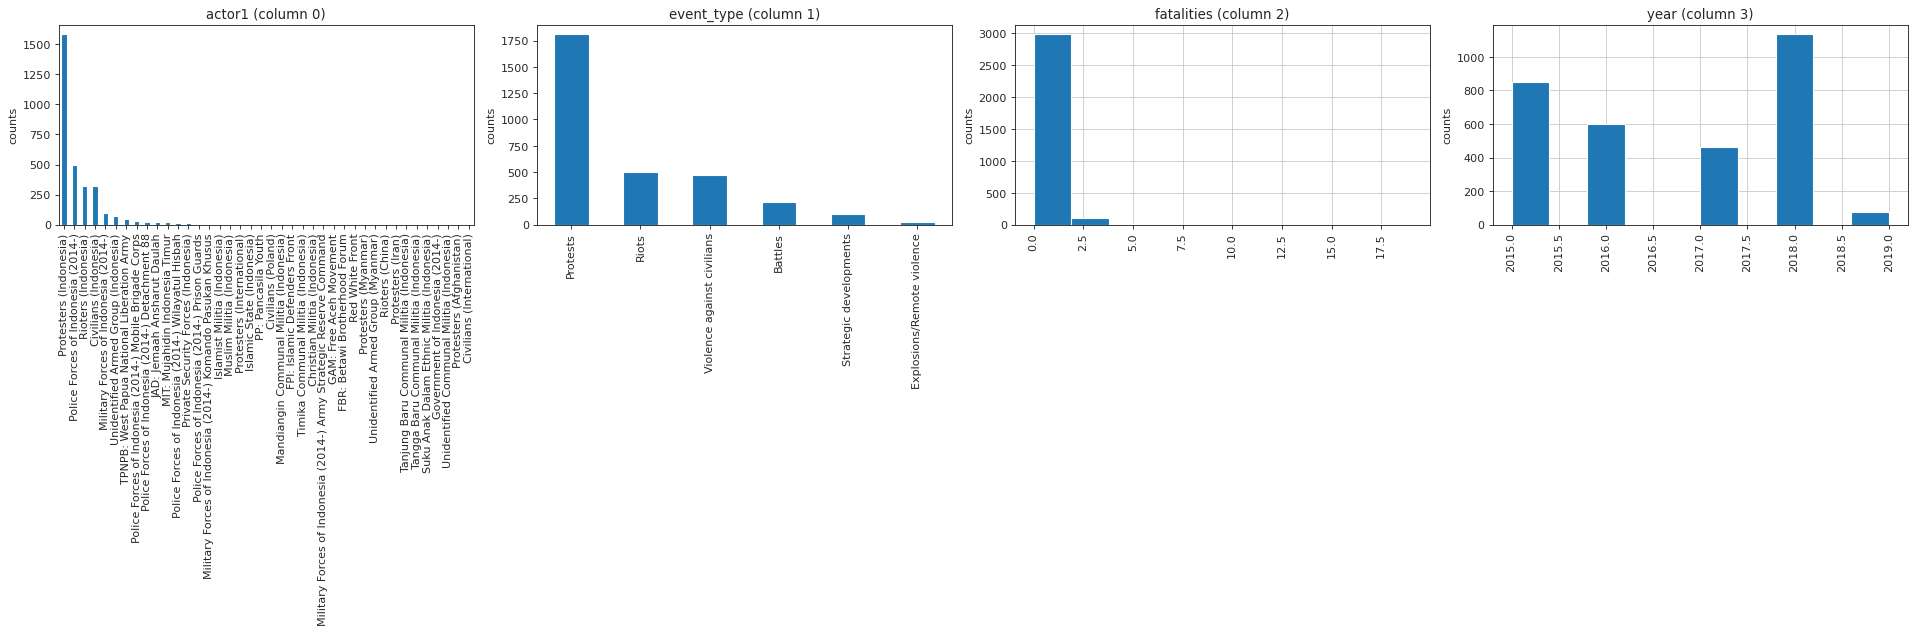

In [ ]:
plotPerColumnDistribution(df, 10, 5)

/tmp/wsuser/ipykernel_563/622901039.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



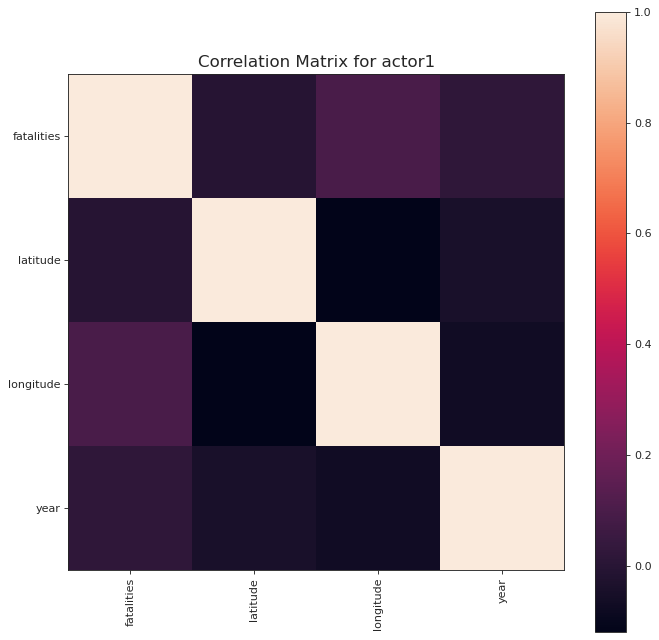

In [ ]:
plotCorrelationMatrix(df, 10)

In [ ]:
map_indonesia = folium.Map(location=[-1.85, 118.04], zoom_start=4)

event_colors = {
    'Protests': 'green',
    'Battles': 'red',
    'Riots': 'blue',
    'Violence against civilians': 'orange',
    'Strategic developments': 'purple'
}

for index, row in df.iterrows():
    event_type = row['event_type']
    if event_type in event_colors:
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            tooltip=row['country'],
            icon=folium.Icon(color=event_colors[event_type])
        ).add_to(map_indonesia)

map_indonesia

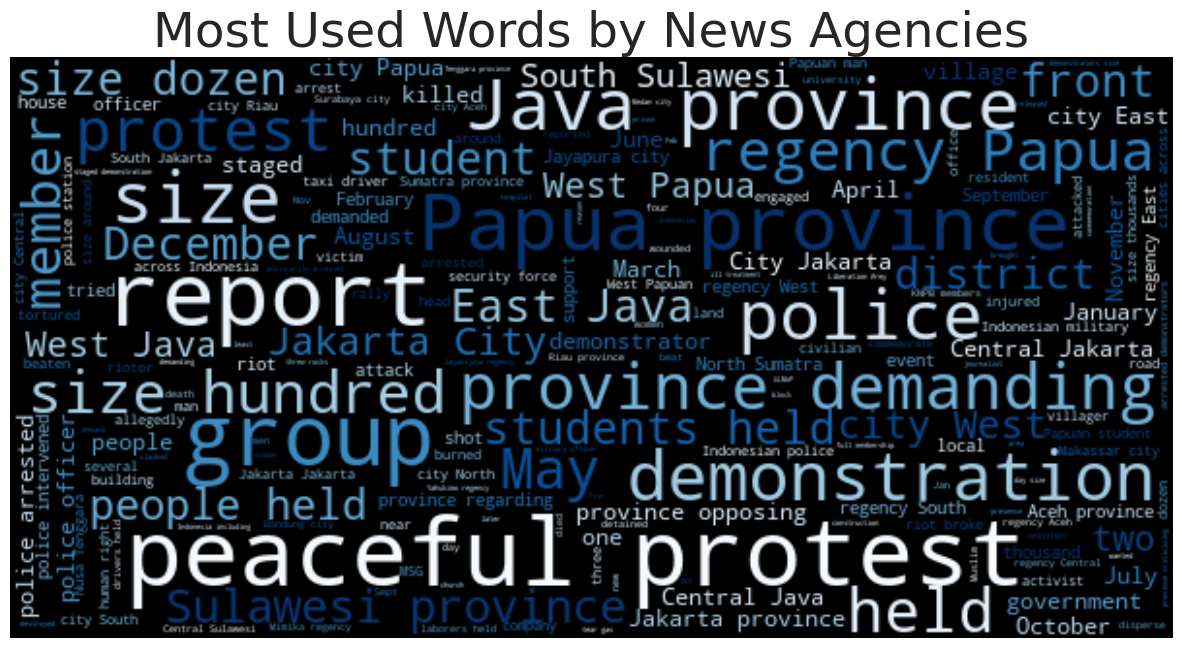

In [ ]:
# Select relevant columns
df = df[['actor1', 'event_type', 'fatalities', 'latitude', 'longitude', 'year','notes']]

# Generate a word cloud from 'notes' column
wc = WordCloud(max_font_size=50, width=600, height=300, colormap='Blues')
wc.generate(' '.join(df['notes'].values))

plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation="bilinear")
plt.title("Most Used Words by News Agencies", fontsize=35)
plt.axis("off")
plt.show()

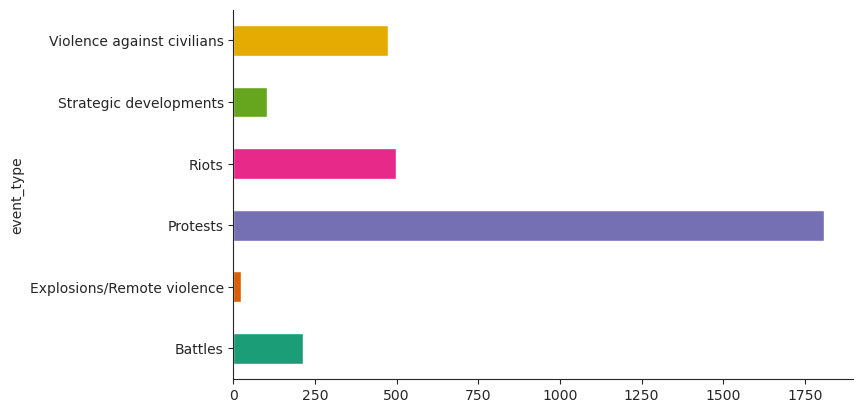

In [ ]:
# Function to plot categorical histograms
def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
    df.groupby(colname).size().plot(kind='barh', color=sns.color_palette(mpl_palette_name), figsize=(8 * figscale, 4.8 * figscale))
    plt.gca().spines[['top', 'right']].set_visible(False)

# Plot categorical histogram for 'event_type'
categorical_histogram(df, 'event_type')

## Penjelasan Kolom event_type :
0. Battles : Merujuk pada konflik bersenjata antara dua atau lebih pihak yang terlibat dalam pertempuran terbuka. Ini dapat mencakup pertempuran militer, pertempuran perang saudara, atau pertempuran lain yang melibatkan kekuatan bersenjata.

1. Explosions/Remote violence : Merujuk pada peristiwa yang melibatkan ledakan atau serangan dari jarak jauh, seperti serangan bom, ledakan perangkat peledak, atau serangan yang melibatkan senjata jarak jauh.

2. Protests : Merujuk pada tindakan massa atau demonstrasi oleh individu atau kelompok yang melakukan protes terhadap pemerintah, lembaga, atau isu tertentu.

3. Riots : Merujuk pada tindakan massa yang melibatkan kekerasan, kerusakan properti, dan tindakan kriminal lainnya.

4. Strategic Development : merujuk pada peristiwa yang berhubungan dengan perkembangan strategis atau taktis dalam suatu wilayah atau negara yang dapat memiliki dampak pada konflik, keamanan, atau ketegangan internasional.

5. Violence against civilians : Merujuk pada kekerasan yang ditujukan kepada warga sipil yang tidak terlibat dalam konflik bersenjata. Ini dapat mencakup serangan terhadap warga sipil, penindasan, atau pelanggaran hak asasi manusia.

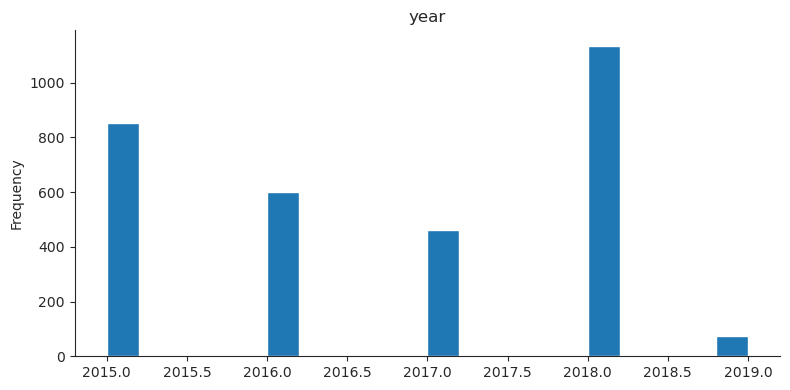

In [ ]:
# Function to plot histograms
def histogram(df, colname, num_bins=20, figscale=1):
    df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8 * figscale, 4 * figscale))
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.tight_layout()

# Plot histogram for 'year' column
histogram(df, 'year')

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['actor1','notes',])

In [ ]:
df

,event_type,fatalities,latitude,longitude,year
0,Battles,0,-4.3887,138.2340,2019
1,Battles,0,-4.3887,138.2340,2019
2,Violence against civilians,0,-4.0951,138.9449,2019
3,Violence against civilians,0,-4.0951,138.9449,2019
4,Protests,0,-6.3037,106.7800,2019
...,...,...,...,...,...
3116,Protests,0,-6.2146,106.8450,2015
3117,Battles,3,-4.4210,136.8588,2015
3118,Battles,3,-4.4210,136.8588,2015
3119,Riots,0,5.8925,95.3220,2015


In [ ]:
# Encode the 'event_type' column
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder yang akan digunakan untuk mengkodekan kolom 'event_type' menjadi angka.
label_encoder = LabelEncoder()
# Menggunakan LabelEncoder untuk menggantikan nilai teks dalam kolom 'event_type' dengan nilai numerik.
df['event_type'] = label_encoder.fit_transform(df['event_type'])

# Menggantikan kolom 'event_type' dalam DataFrame 'df' dengan hasil transformasi LabelEncoder.
# 'X' akan menjadi dataset fitur (input) yang tidak termasuk kolom 'event_type'.
# 'y' akan menjadi target (output) yang berisi kolom 'event_type'.
X = df.drop(columns=['event_type'])
y = df['event_type']

# Membagi dataset menjadi dua bagian: data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform k-fold cross-validation
from sklearn.model_selection import KFold

# Inisialisasi KFold cross-validation dengan 5 fold (lipatan), shuffle data, dan seed (random_state) 42.
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Melakukan iterasi pada setiap fold dari KFold.
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Import and create an ensemble classifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Membuat instance dari berbagai model klasifikasi yang berbeda.
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Membuat ensambel classifier (VotingClassifier) yang menggabungkan model-model individu.
ensemble_classifier = VotingClassifier(estimators=[
    ('Decision Tree', decision_tree_model),
    ('Random Forest', random_forest_model),
    ('Gradient Boosting', gradient_boosting_model),
    ('SVM', svm_model)
], voting='soft')

# Melatih ensambel classifier pada data latih.
ensemble_classifier.fit(X_train, y_train)

# Perform cross-validation to evaluate the model
from sklearn.model_selection import cross_val_score

# Melakukan validasi silang untuk mengevaluasi model.
# Menghitung akurasi model pada setiap fold dari cross-validation.
cv_scores = cross_val_score(ensemble_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Menampilkan akurasi pada setiap fold cross-validation.
for i, score in enumerate(cv_scores, start=1):
    accuracy_percent = score * 100
    print(f"Fold {i} - Accuracy: {accuracy_percent:.2f}%")

# Menghitung rata-rata akurasi dari seluruh fold cross-validation.
mean_accuracy = np.mean(cv_scores)
mean_accuracy_percent = mean_accuracy * 100
print(f"Rata-rata Akurasi: {mean_accuracy_percent:.2f}%")

# Melakukan prediksi pada data uji.
y_pred = ensemble_classifier.predict(X_test)

# Evaluate the model on the test data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mengukur performa model pada data uji menggunakan berbagai metrik evaluasi.
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan hasil prediksi dan metrik-metrik evaluasi.
print("Hasil Prediksi:")
print(y_pred)
print("\nAkurasi Prediksi: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Menampilkan matriks keakuratan (confusion matrix).
confusion = confusion_matrix(y_test, y_pred)
print("\nMatriks Keakuratan:\n")
print(confusion)

Fold 1 - Accuracy: 61.00%
Fold 2 - Accuracy: 61.60%
Fold 3 - Accuracy: 46.89%
Fold 4 - Accuracy: 54.31%
Fold 5 - Accuracy: 45.49%
Rata-rata Akurasi: 53.86%
Hasil Prediksi:
[0 2 3 2 4 2 3 3 3 0 2 4 0 2 2 2 2 2 2 5 5 2 2 5 3 2 5 3 2 2 3 5 2 2 2 0 2
 5 5 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 5 2 2 2 2 0 2 2 2 2 2 2 3 2 4 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 5 2 5 2 2 2 2 2 2 3 2 0 2 2 2 2 5 2 2 2 2 2
 2 2 2 2 2 3 3 2 3 0 5 5 2 2 2 2 2 2 5 3 0 4 3 5 0 5 2 2 2 2 2 2 2 5 3 2 0
 2 0 0 0 0 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 2 2 2 2 2 2 5 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 5 2 5 2 2
 2 2 2 3 2 5 2 2 2 5 2 2 2 3 2 2 2 2 2 5 5 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 5
 5 5 2 5 2 0 5 2 2 0 5 2 5 2 2 4 5 5 2 3 3 2 2 2 5 2 2 2 3 5 2 5 3 5 5 5 5
 2 2 2 1 1 1 5 2 2 2 2 2 0 5 2 2 2 5 5 2 5 2 2 2 2 2 2 2 5 2 2 2 2 5 2 2 0
 2 3 2 2 5 3 3 2 5 2 2 2 2 2 5 2 2 2 2 2 3 2 3 3 2 2 2 2 2 3 2 2 2 5 0 2 5
 2 2 5 3 5 2 2 2 2 3 2 3 2 2 3 3 2 0 2 2 5 2 2 2 2 2 5 2 2 2 2 2 2 2 2 5 2
 5 

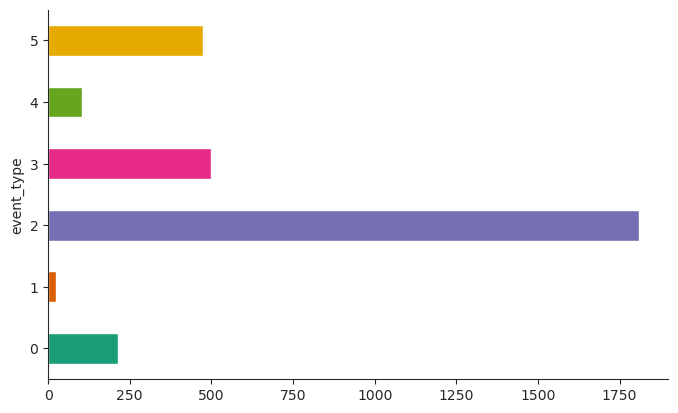

In [ ]:
# Function to plot categorical histograms
def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
    df.groupby(colname).size().plot(kind='barh', color=sns.color_palette(mpl_palette_name), figsize=(8 * figscale, 4.8 * figscale))
    plt.gca().spines[['top', 'right']].set_visible(False)

# Plot categorical histogram for 'event_type'
categorical_histogram(df, 'event_type')